In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import tree
import librosa
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Extract features (mfcc, chroma, mel) from a sound file
#if chroma do short time fourier transform
#hstack() stacks arrays in sequence horizontally (in a columnar fashion)
#chroma-pertains to 12 pitch class,hstack() stacks arrays in sequence horizontally (in a columnar fashion),
#mel: Mel Spectrogram Frequency
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        sample_rate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:#frequency domain feature
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [22]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['neutral', 'calm', 'happy', 'fearful', 'surprised', 'angry']

In [23]:
#DataFlair - Load the data and extract features for each sound file
def load_data():
    x,y=[],[]
    for file in glob.glob("C:\\Users\COMPUTER\Desktop\Speech_Recognition_dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        if emotion=='calm':
           emotion='not_confident'
        elif emotion=='fearful':
           emotion='not_confident'
        elif emotion=='neutral':
           emotion='not_confident'
        else:
          emotion='confident'
        y.append(emotion)
        
    return x,y


In [24]:
import numpy
X,y=load_data()
x = numpy.array(X)
y=numpy.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2','none'], 
    'C'       : [1,3,5],
    'solver'  : ['newton-cg','sag','saga'],
    'max_iter': [100,200,500]
}



logreg = LogisticRegression()
clf = GridSearchCV(logreg, n_jobs=None or 1,                 # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds



clf.fit(x_train,y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)
print("Accuracy :",clf.best_score_)
# All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7725637181409295


In [26]:

# Best paramete set
print('Best parameters found:\n', clf.best_params_)
print("Accuracy :",clf.best_score_)

Best parameters found:
 {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7725637181409295


In [27]:
y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
               precision    recall  f1-score   support

    confident       0.76      0.81      0.79        96
not_confident       0.80      0.75      0.77        96

     accuracy                           0.78       192
    macro avg       0.78      0.78      0.78       192
 weighted avg       0.78      0.78      0.78       192



In [28]:
##############################################the end ###########################################

In [29]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.12%


In [30]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.12%


In [31]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

    confident       0.76      0.81      0.79        96
not_confident       0.80      0.75      0.77        96

     accuracy                           0.78       192
    macro avg       0.78      0.78      0.78       192
 weighted avg       0.78      0.78      0.78       192



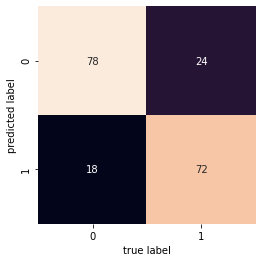

In [32]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [33]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def cross_validation(clf,x,y,cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(clf, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()}
lr_result = cross_validation(clf, x_train,y_train, 5)
print(lr_result)

# report performance
#print('%.3f', 100*scores)
#print('Auracy: %.3f (%.3f)' % (100*mean(scores['accuracy_score']), 100*std(scores['accuracy'])))

{'Training Accuracy scores': array([0.94130435, 0.84381779, 0.84598698, 0.84381779, 0.84815618]), 'Validation Accuracy scores': array([0.74137931, 0.77391304, 0.73913043, 0.74782609, 0.77391304]), 'Training Precision scores': array([0.94131269, 0.8439277 , 0.84791004, 0.84444759, 0.84825295]), 'Validation Precision scores': array([0.74253286, 0.77686203, 0.73940678, 0.74788136, 0.77421308]), 'Training Recall scores': array([0.94130435, 0.84379823, 0.84590627, 0.84386411, 0.84817429]), 'Validation Recall scores': array([0.74137931, 0.77434967, 0.73926195, 0.7477314 , 0.77404719]), 'Training F1 scores': array([0.94130407, 0.84379941, 0.84575182, 0.84375824, 0.84814975]), 'Validation F1 scores': array([0.74107143, 0.77348485, 0.73911071, 0.74774979, 0.77389595]), 'Mean Training Accuracy': 86.46166179383194, 'Mean Validation Accuracy': 75.5232383808096, 'Mean Training Precision': 0.8651701922682433, 'Mean Validation Precision': 0.7561792185903722, 'Mean Training Recall': 0.8646094485224921

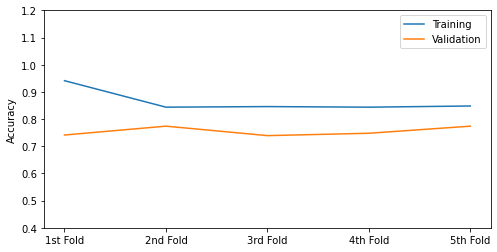

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(
lr_result["Training Accuracy scores"])
plt.plot(
lr_result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
x,y=load_data()
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)
model= LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'newton-cg')
model.fit(x_train,y_train)
y_true, y_pred = y_test , model.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
               precision    recall  f1-score   support

    confident       0.86      0.85      0.86        96
not_confident       0.86      0.86      0.86        96

     accuracy                           0.86       192
    macro avg       0.86      0.86      0.86       192
 weighted avg       0.86      0.86      0.86       192

